In [1]:
library(caret)
library(glmnet)
library(boot)

Loading required package: lattice
Loading required package: ggplot2
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: ‘boot’

The following object is masked from ‘package:lattice’:

    melanoma



In [2]:
all_data <- tail(read.csv("../btc_data_csv/imp_coin.csv"),517)[-c(1,2,4,5,6,8)]
# [c(3,7,9,15,21,27,33,39,45)]
# all_data <- tail(read.csv("../imp_coin.csv")[c(3,7,9,13,15,19,21,25,27,31,33,37,39,43)], 1000)

btc_price btc_open btc_high btc_low btc_vol btc_change
bch_price bch_open bch_high bch_low bch_vol bch_change
eos_price eos_open eos_high eos_low eos_vol eos_change 
eth_price eth_open eth_high eth_low eth_vol eth_change
ltc_price ltc_open ltc_high ltc_low ltc_vol ltc_change
usdt_price usdt_open usdt_high usdt_low usdt_vol usdt_change
xrp_price xrp_open xrp_high xrp_low xrp_vol xrp_change
btcsv_price btcsv_open btcsv_high btcsv_low btcsv_vol btcsv_change

# Create glm model on all data from 2017

## test on step on all variable result


K : The number of groups into which the data should be split to estimate the cross-validation prediction error. The value of K must be such that all groups are of approximately equal size. If the supplied value of K does not satisfy this criterion then it will be set to the closest integer which does and a warning is generated specifying the value of K used. The default is to set K equal to the number of observations in data which gives the usual leave-one-out cross-validation.

$delta :
A vector of length two. 

The first component is the raw cross-validation estimate of prediction error. 

The second component is the adjusted cross-validation estimate.The adjustment is designed to compensate for the bias introduced by not using leave-one-out cross-validation.

cv : 8333.54530255359

formula: ( after step direction both and k = 10 )

model : btc_price ~ bch_high + bch_low + bch_vol + eth_price + ltc_price + ltc_vol + usdt_price + btcsv_vol

SME of the model = 1097267.33637841

In [3]:
lm_all <- glm(btc_price~ btc_vol+
bch_price+ bch_open+ bch_high+ bch_low +bch_vol+ bch_change+
eos_price +eos_open +eos_high+ eos_low+ eos_vol+ eos_change+
eth_price+ eth_open+ eth_high+ eth_low+ eth_vol+ eth_change+
ltc_price+ ltc_open+ ltc_high+ ltc_low+ ltc_vol+ ltc_change+
usdt_price+ usdt_open+ usdt_high+ usdt_low+ usdt_vol+ usdt_change+
xrp_price+ xrp_open+ xrp_high+ xrp_low+ xrp_vol+ xrp_change+
btcsv_price+ btcsv_open+ btcsv_high+ btcsv_low+ btcsv_vol+ btcsv_change, data = all_data)

In [4]:
set.seed(1)
cv.glm(all_data, lm_all, K = 10)$delta
step(data=all_data, lm_all, direction="both",k=10)

[1] 1272858 1251342

Start:  AIC=9011.7
btc_price ~ btc_vol + bch_price + bch_open + bch_high + bch_low + 
    bch_vol + bch_change + eos_price + eos_open + eos_high + 
    eos_low + eos_vol + eos_change + eth_price + eth_open + eth_high + 
    eth_low + eth_vol + eth_change + ltc_price + ltc_open + ltc_high + 
    ltc_low + ltc_vol + ltc_change + usdt_price + usdt_open + 
    usdt_high + usdt_low + usdt_vol + usdt_change + xrp_price + 
    xrp_open + xrp_high + xrp_low + xrp_vol + xrp_change + btcsv_price + 
    btcsv_open + btcsv_high + btcsv_low + btcsv_vol + btcsv_change

               Df  Deviance    AIC
- ltc_change    1 478414900 9001.7
- eth_vol       1 478440871 9001.7
- usdt_low      1 478453257 9001.7
- btcsv_low     1 478470095 9001.8
- eth_change    1 478475222 9001.8
- xrp_vol       1 478492167 9001.8
- btcsv_price   1 478560536 9001.9
- eth_high      1 478561116 9001.9
- xrp_change    1 478575634 9001.9
- btcsv_high    1 478593474 9001.9
- usdt_open     1 478617272 9001.9
- eos_change    1 


Call:  glm(formula = btc_price ~ bch_high + bch_low + bch_vol + eth_price + 
    ltc_price + ltc_vol + usdt_price + btcsv_vol, data = all_data)

Coefficients:
(Intercept)     bch_high      bch_low      bch_vol    eth_price    ltc_price  
  3.186e+04   -2.212e+00    5.882e+00    8.585e-04   -2.272e+00    2.622e+01  
    ltc_vol   usdt_price    btcsv_vol  
  2.788e-04   -2.960e+04   -2.326e-03  

Degrees of Freedom: 516 Total (i.e. Null);  508 Residual
Null Deviance:	    5.003e+09 
Residual Deviance: 535600000 	AIC: 8648

In [5]:
set.seed(1)
training.samples <- createDataPartition(all_data$btc_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]

test_model = glm(formula = btc_price ~ bch_high + bch_low + bch_vol + eth_price + ltc_price + ltc_vol + usdt_price + btcsv_vol, data = train.data)
a = test.data[c('bch_high', 'bch_low', 'bch_vol', 'eth_price', 'ltc_price', 'ltc_vol', 'usdt_price', 'btcsv_vol')]

pred = predict(test_model, a)
# plot.ts(test.data$btc_price)
# lines(pred, col="green")
mean((test.data$btc_price - pred)^2)

[1] 1097267

## test on step on Price Variable
the result of cv is higher(1326932) than the first step result (1272857)

but the MSE after training is lower MSE= 1038883 < 1097267

In [6]:
price_model = glm(formula = btc_price ~ bch_price + eos_price + eth_price + ltc_price + usdt_price + xrp_price + btcsv_price,data = all_data)
cv.glm(all_data, price_model, K = 10)$delta
step(data=all_data, price_model, direction="both",k=10)


[1] 1326932 1324187

Start:  AIC=8817.86
btc_price ~ bch_price + eos_price + eth_price + ltc_price + usdt_price + 
    xrp_price + btcsv_price

              Df   Deviance    AIC
- eos_price    1  660094391 8808.1
- xrp_price    1  662140746 8809.7
<none>            659750790 8817.9
- btcsv_price  1  682750399 8825.6
- usdt_price   1  689810119 8830.9
- eth_price    1  707446560 8843.9
- bch_price    1  882143243 8958.0
- ltc_price    1 1010250140 9028.1

Step:  AIC=8808.13
btc_price ~ bch_price + eth_price + ltc_price + usdt_price + 
    xrp_price + btcsv_price

              Df   Deviance    AIC
- xrp_price    1  662335318 8799.9
<none>            660094391 8808.1
- btcsv_price  1  683014410 8815.8
+ eos_price    1  659750790 8817.9
- usdt_price   1  690351984 8821.3
- eth_price    1  719292306 8842.5
- bch_price    1  882166081 8948.1
- ltc_price    1 1011354216 9018.7

Step:  AIC=8799.88
btc_price ~ bch_price + eth_price + ltc_price + usdt_price + 
    btcsv_price

              Df   Deviance    AIC
<n


Call:  glm(formula = btc_price ~ bch_price + eth_price + ltc_price + 
    usdt_price + btcsv_price, data = all_data)

Coefficients:
(Intercept)    bch_price    eth_price    ltc_price   usdt_price  btcsv_price  
  30701.361        2.620       -2.772       30.510   -27347.345       -8.728  

Degrees of Freedom: 516 Total (i.e. Null);  511 Residual
Null Deviance:	    5.003e+09 
Residual Deviance: 662300000 	AIC: 8752

In [7]:
set.seed(1)
training.samples <- createDataPartition(all_data$btc_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]

price_model = glm(formula = btc_price ~ bch_price + eth_price + ltc_price + usdt_price + btcsv_price,data = train.data)
a = test.data[c('bch_price', 'eth_price', 'ltc_price', 'usdt_price', 'btcsv_price')]

pred = predict(price_model, a)
# plot.ts(test.data$btc_price)
# lines(pred, col="green")
mean((test.data$btc_price - pred)^2)

[1] 1038884

## Test on volume variable
have the  highest cv result 8222623 and MSE = 8358108 on training

In [8]:
volume_model = glm(formula = btc_price ~ bch_vol + eth_vol + ltc_vol + usdt_vol + btcsv_vol ,data = all_data)
cv.glm(all_data, volume_model, K = 10)$delta
step(data=all_data, volume_model, direction="both", k=10)

[1] 8118256 8101833

Start:  AIC=9735.87
btc_price ~ bch_vol + eth_vol + ltc_vol + usdt_vol + btcsv_vol

            Df   Deviance    AIC
- bch_vol    1 4049015555 9725.9
<none>         4048888971 9735.9
- usdt_vol   1 4197098288 9744.5
- eth_vol    1 4248750260 9750.8
- ltc_vol    1 4319462951 9759.3
- btcsv_vol  1 4645960401 9797.0

Step:  AIC=9725.88
btc_price ~ eth_vol + ltc_vol + usdt_vol + btcsv_vol

            Df   Deviance    AIC
<none>         4049015555 9725.9
- usdt_vol   1 4198579591 9734.6
+ bch_vol    1 4048888971 9735.9
- eth_vol    1 4260631449 9742.2
- ltc_vol    1 4323312005 9749.8
- btcsv_vol  1 4756380116 9799.1



Call:  glm(formula = btc_price ~ eth_vol + ltc_vol + usdt_vol + btcsv_vol, 
    data = all_data)

Coefficients:
(Intercept)      eth_vol      ltc_vol     usdt_vol    btcsv_vol  
  6.566e+03   -9.284e-05    4.312e-04    2.161e-04   -7.329e-03  

Degrees of Freedom: 516 Total (i.e. Null);  512 Residual
Null Deviance:	    5.003e+09 
Residual Deviance: 4.049e+09 	AIC: 9686

In [9]:
set.seed(1)
training.samples <- createDataPartition(all_data$btc_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]

price_model = glm(formula = btc_price ~ eth_vol + ltc_vol + usdt_vol + btcsv_vol,data = train.data)
a = test.data[c('eth_vol', 'ltc_vol','usdt_vol', 'btcsv_vol')]

pred = predict(price_model, a)
# plot.ts(test.data$btc_price)
# lines(pred, col="green")
mean((test.data$btc_price - pred)^2)

[1] 8358109

# Lasso

After testing the CreateDataPartition funct and to split the data manullay to 2 data set.

I found that the result of 'createDataPartition' fct used to split the data is better.
createDataPartition sme = 897610

split data manually sme = 1562896 (But the prediction values on the graph are better )

In [10]:
# training.samples <- createDataPartition(all_data$btc_price, p = 0.7, list = FALSE)
# train.data  <- all_data[training.samples, ]
# test.data <- all_data[-training.samples, ]
train.data  <- head(all_data, 400)
test.data <- tail(all_data, -400)

In [11]:
x <- model.matrix(btc_price~., train.data)[,-1]
y <- as.double(train.data$btc_price)
x.test <- model.matrix(btc_price ~., test.data)[,-1]
lambdas_to_try <- 10^seq(-3, 10, length.out = 100)
set.seed(1) 
cv.lasso <- cv.glmnet(x, y, alpha = 1, type.measure='mse', lambda = lambdas_to_try, nfolds = 10)

In [12]:
model_10_nfolds <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
pred_10 = predict(model_10_nfolds, newx = x.test)

In [13]:
mean((test.data$btc_price - pred_10)^2)

[1] 1562896

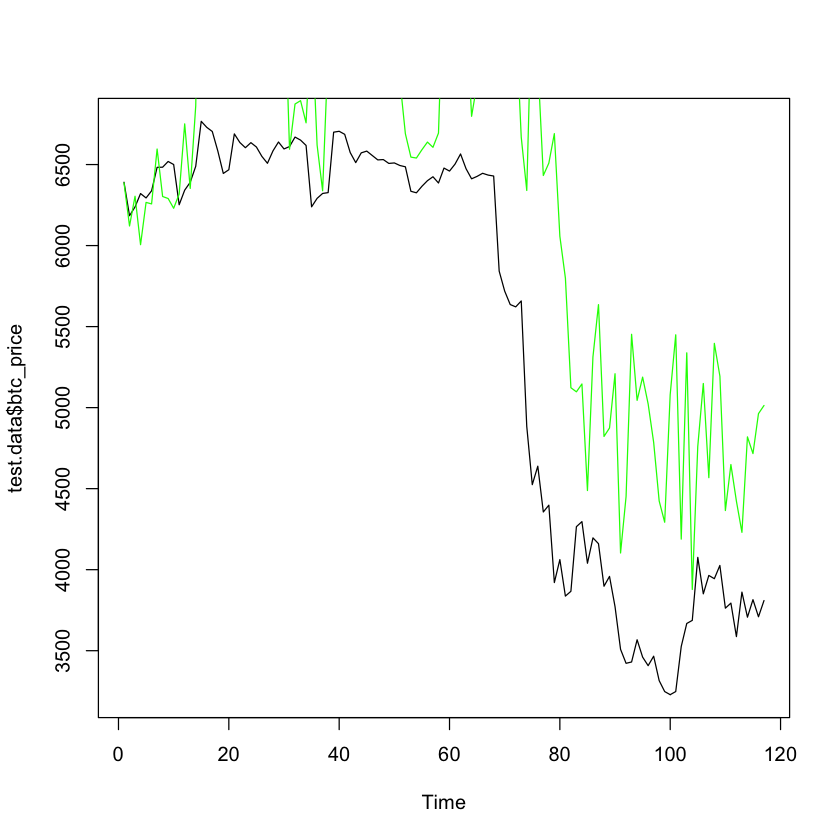

In [14]:
plot.ts(test.data$btc_price)
lines(pred_10, col="green")

[1] 897610

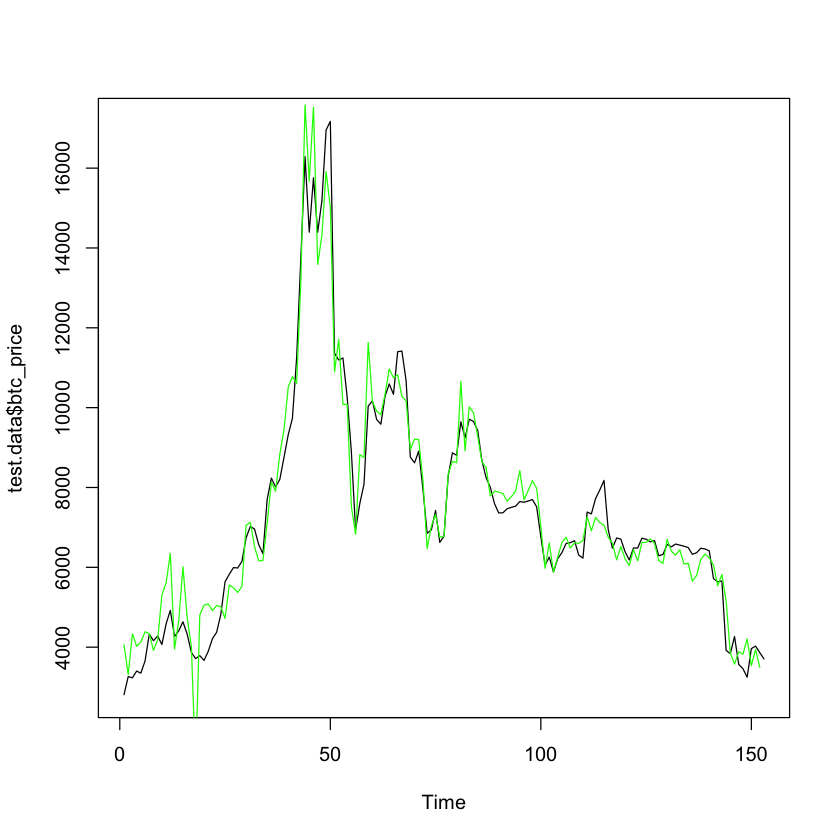

In [15]:
set.seed(1)
training.samples <- createDataPartition(all_data$btc_price, p = 0.7, list = FALSE)
train.data  <- all_data[training.samples, ]
test.data <- all_data[-training.samples, ]
x <- head(model.matrix(btc_price~., train.data)[,-1], -1)
y <- tail(as.double(train.data$btc_price), -1)
x.test <- head(model.matrix(btc_price ~., test.data)[,-1], -1)
lambdas_to_try <- 10^seq(-3, 10, length.out = 100)

cv.lasso <- cv.glmnet(x, y, alpha = 1, type.measure='mse', lambda = lambdas_to_try, nfolds = 10)
model_10_nfolds <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = cv.lasso$lambda.min)
pred_10 = predict(model_10_nfolds, newx = x.test)
mean((tail(test.data$btc_price,-1) - pred_10)^2)
plot.ts(test.data$btc_price)
lines(pred_10, col="green")

# Testing on the 3 coin with dealy 3 day

the file in genrated to predict the price of btc price based on the 3 days before of 3 coins(eth, ltc, xrp)  + btc price.

and the result of training based on createDataPartition has higher MSE while training on the first 80%.
otherwise of the LASSO Model.

The problem we have in this all the models of this data set is the delay of one day in the prediction.

we test 3 model :

1) all variable       , mse = 45247, cv = 144650

2) variable after step, mse = 32974, cv = 135400

3) only btc price     , mse = 30021, cv = 151878

In [16]:
all_data_3 <- read.csv("../btc_data_csv/coin_3_day.csv")[-c(8,12,16)]

In [17]:
set.seed(1)
lm_3 <- glm(btc_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc +ltc_1+ltc_2+xrp+xrp_1+xrp_2, data = all_data_3)
cv.glm(all_data_3, lm_3, K = 10)$delta
step(data=all_data_3, lm_3, direction="both",k=10)

[1] 136180 135423

Start:  AIC=10726.76
btc_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc + ltc_1 + 
    ltc_2 + xrp + xrp_1 + xrp_2

        Df  Deviance   AIC
- ltc    1  89141348 10717
- eth_2  1  89149585 10717
- eth_1  1  89322946 10718
- ltc_1  1  89423451 10719
- btc    1  89747665 10722
- eth    1  89832995 10722
- ltc_2  1  89864096 10723
<none>      89134690 10727
- btc_1  1  91550287 10736
- xrp_2  1  91623682 10737
- xrp_1  1  99338055 10796
- xrp    1  99915078 10800
- btc_2  1 177041499 11216

Step:  AIC=10716.81
btc_3 ~ btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc_1 + ltc_2 + 
    xrp + xrp_1 + xrp_2

        Df  Deviance   AIC
- eth_2  1  89153257 10707
- eth_1  1  89324131 10708
- ltc_1  1  89570045 10710
- btc    1  89771626 10712
- ltc_2  1  89874968 10713
- eth    1  89890061 10713
<none>      89141348 10717
+ ltc    1  89134690 10727
- xrp_2  1  91670641 10727
- btc_1  1  91720753 10728
- xrp_1  1  99350667 10786
- xrp    1  99915890 10790
- btc_2  1 179440949 11216

Step:  


Call:  glm(formula = btc_3 ~ btc + btc_1 + btc_2 + xrp + xrp_1 + xrp_2, 
    data = all_data_3)

Coefficients:
(Intercept)          btc        btc_1        btc_2          xrp        xrp_1  
    29.6000       0.1684      -0.3422       1.1811   -2274.6615    3523.6529  
      xrp_2  
 -1408.4748  

Degrees of Freedom: 727 Total (i.e. Null);  721 Residual
Null Deviance:	    1.019e+10 
Residual Deviance: 91250000 	AIC: 10630

In [18]:
test3= glm(formula = btc_3 ~ btc + btc_1 + btc_2 + xrp + xrp_1 + xrp_2, data = all_data_3)
cv.glm(all_data_3, test3, K = 10)$delta

[1] 138971.4 138211.0

In [19]:
test3= glm(formula = btc_3 ~ btc + btc_1 + btc_2 , data = all_data_3)
cv.glm(all_data_3, test3, K = 10)$delta

[1] 149669.8 149402.6

In [20]:
set.seed(1)
# training.samples <- createDataPartition(all_data_3$btc_3, p = 0.8, list = FALSE)
# train.data  <- all_data_3[training.samples, ]
# test.data <- all_data_3[-training.samples, ]

train.data  <- head(all_data_3, 584)
test.data <- tail(all_data_3, -584)

test3 <- glm(formula = btc_3 ~btc + btc_1 + btc_2 + eth + eth_1 + eth_2 + ltc +ltc_1+ltc_2+xrp+xrp_1+xrp_2 , data = train.data)

pred_5 = predict(test3, test.data[-4])
# plot.ts(test.data$btc_3)
# lines(pred_5, col="green")
mean((test.data$btc_3 - pred_5)^2)

[1] 45247.21